## Implementing Linear Regression with one variable

In [4]:
import numpy
import matplotlib.pyplot as plt
from utils import *
import math
%matplotlib inline

In [5]:
x_train, y_train = load_data()

In [6]:
x_train[:5]

array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598])

In [7]:
y_train[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

In [8]:
print("x_train dimensions: ", x_train.shape)
print("y_train dimensions: ", y_train.shape)

x_train dimensions:  (97,)
y_train dimensions:  (97,)


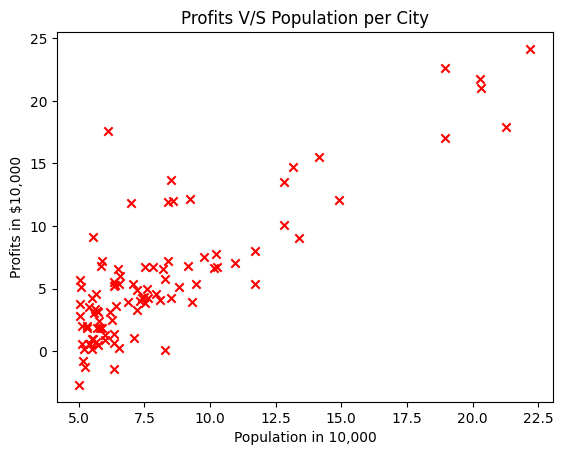

In [10]:
plt.scatter(x_train, y_train, c='r', marker='x')
plt.title("Profits V/S Population per City")
plt.ylabel("Profits in $10,000")
plt.xlabel("Population in 10,000")
plt.show()

In [13]:
def compute_cost(x, y, w, b):
    y_pred = x * w + b
    total_cost = (np.sum((y_pred - y) ** 2) / (2 * x.shape[0]))
    return total_cost

In [16]:
initial_w = 2
initial_b = 1

cost = compute_cost(x_train, y_train, initial_w, initial_b)
print(type(cost))
print(f'Cost at initial w (zeros): {cost : 3f}')

from public_tests import *
compute_cost_test(compute_cost)

<class 'numpy.float64'>
Cost at initial w (zeros):  75.203385
All tests passed!


In [17]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    y_pred = x * w + b
    dw = np.sum((y_pred - y) * x) / m
    db = np.sum(y_pred - y) / m
    
    return dw, db

In [18]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, initial_w, initial_b)
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

compute_gradient_test(compute_gradient)

Gradient at initial w, b (zeros): -65.32884974555671 -5.839135051546393
Using X with shape (4, 1)
All tests passed!


In [19]:
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114433 -4.007175051546392


In [20]:
import copy

def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters): 
    m = x.shape[0]
    
    # An array to store cost J and w's at each iteration — primarily for graphing later
    J_history = []
    w_history = []
    
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_dw, dj_db = gradient_function(x, y, w, b )  

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
        
    return w, b, J_history, w_history #return w and J,w history for graphing

In [21]:
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost     6.74   
Iteration  150: Cost     5.31   
Iteration  300: Cost     4.96   
Iteration  450: Cost     4.76   
Iteration  600: Cost     4.64   
Iteration  750: Cost     4.57   
Iteration  900: Cost     4.53   
Iteration 1050: Cost     4.51   
Iteration 1200: Cost     4.50   
Iteration 1350: Cost     4.49   
w,b found by gradient descent: 1.166362350335582 -3.6302914394043597


In [22]:
y_pred = x_train * w + b

In [23]:
y_pred.shape

(97,)

Text(0.5, 0, 'Population of City in 10,000s')

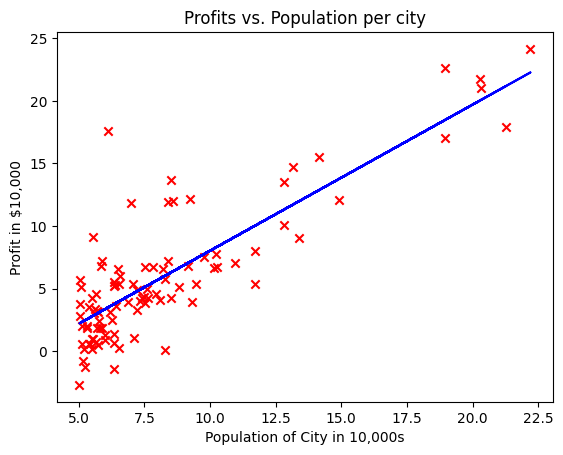

In [24]:
plt.plot(x_train, y_pred, c='b')
plt.scatter(x_train, y_train, c='r', marker='x')

plt.title("Profits vs. Population per city")
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')

In [25]:

predict1 = 3.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (predict1*10000))

predict2 = 7.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45
